<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [7]:
df = pd.read_csv('./data/sacramento_real_estate_transactions.csv')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import datetime as datetime

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [15]:
#Look at columns
print(df.head())
print(df.columns)
print(df.dtypes)
print(df.describe())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  
Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longi

In [8]:
# A: Check for missing data 
df.isnull().sum().sort_values(ascending=False)

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [20]:
#what are the different types of houses?
df['type'].value_counts()

Residential     917
Condo            53
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [22]:
#Unkown?
df[df['type'] =='Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [25]:
#Update to Unknown
df.at[757,'type']='Unknown'

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unknown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [31]:
# Making type into true/false
df['Residential']=np.where(df['type']=='Residential',1,0)
print(df['Residential'].value_counts())

1    917
0     67
Name: Residential, dtype: int64


In [16]:
#Negative square feet?
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [17]:
#Price is negative also
df[df['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [18]:
#row is all messed up - deleting this one row
df.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

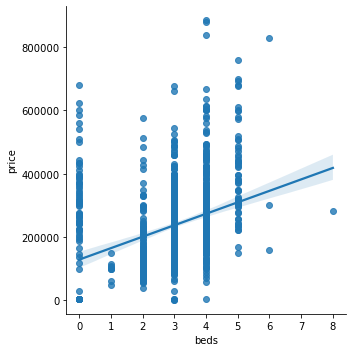

In [26]:
# A: bedrooms, bathrooms, square foot, type
sns.lmplot(x='beds', y='price', data=df)
plt.show()

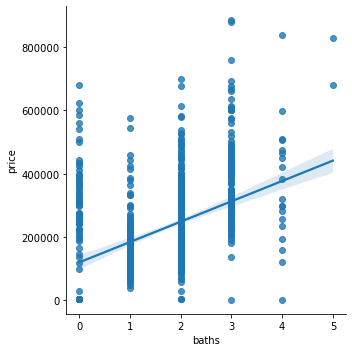

In [27]:
sns.lmplot(x='baths', y='price', data=df)
plt.show()

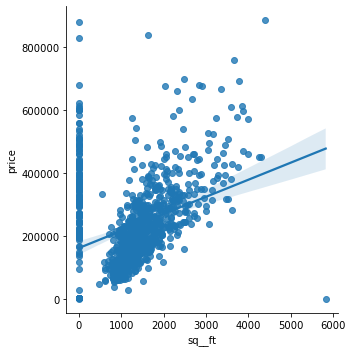

In [29]:
sns.lmplot(x='sq__ft', y='price', data=df)
plt.show()

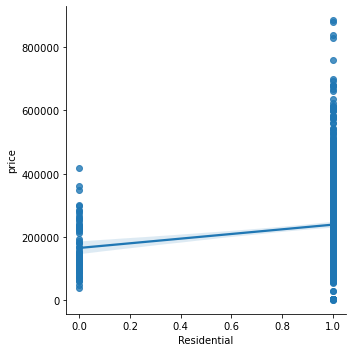

In [33]:
sns.lmplot(x='Residential', y='price', data=df)
plt.show()

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [69]:
corr = df.corr()
corr['price'].sort_values()

zip           -0.093232
latitude      -0.039506
Residential    0.134179
longitude      0.284472
sq__ft         0.333861
beds           0.342152
baths          0.416225
price          1.000000
Name: price, dtype: float64

In [5]:
# A: square feet, bedrooms, and bathrooms have the highest correlation with price 
# as compared to residential type

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
# A: 
features = ['baths','sq__ft']
y = df['price']
X = df[features]
print(y.shape, X.shape)

(984,) (984, 2)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [66]:
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [67]:
print(mymodel.intercept_)
mymodel.coef_

128606.3977993323


array([5.08705261e+04, 1.29387293e+01])

In [68]:
#model equation
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,2)} + {round(xcoefs[0][0],2)}*{xcoefs[0][1]} + {round(xcoefs[1][0],2)}*{xcoefs[1][1]}'
print("Regression Equation: ", equation) 

Regression Equation:  y = 128606.4 + 50870.53*baths + 12.94*sq__ft


### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A: If there are no bathrooms, or square feet, 
# then the house price prediction is $129k

# For every square foot, the price prediction increases by ~$13, 
# and for every bathroom, the price prediction increases by ~$51k

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A: prediction: someone could use this model to predict the price at which a 
# particular house could sell, based on the square footage and number of bathrooms

# inference: someone could use this model equation to make an inference about
# which features of a house have the most impact on price (in this case, it would be bathrooms)

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: